In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import csv


from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

split train(2011-2016) and test(2017-2019)

In [2]:
"""read data"""
datafilepath = "../house_sales_2011_2019.csv"
dataset = pd.read_csv(datafilepath)
dataset.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,YEAR BUILT,SALE DATE,SALE PRICE,PRICE_SQFT
0,2,3039,64,01 ONE FAMILY HOMES,10458.0,1.0,0.0,1.0,1667.0,1296.0,1,1910.0,2011-01-19,329000,253.858025
1,2,3046,34,01 ONE FAMILY HOMES,10457.0,1.0,0.0,1.0,2060.0,1629.0,1,1899.0,2011-06-29,288500,177.102517
2,2,3048,28,01 ONE FAMILY HOMES,10457.0,1.0,0.0,1.0,1209.0,1048.0,1,1901.0,2011-03-21,122500,116.889313
3,2,4707,20,01 ONE FAMILY HOMES,10469.0,1.0,0.0,1.0,3203.0,1890.0,1,1945.0,2011-02-17,330000,174.603175
4,2,4707,74,01 ONE FAMILY HOMES,10469.0,1.0,0.0,1.0,1785.0,1018.0,1,1945.0,2011-02-16,288000,282.907662


In [3]:
category2idx = list(enumerate(dataset['BUILDING CLASS CATEGORY'].unique()))
category2idx
category_idx_dict = {}
for idx, category in category2idx:
    category_idx_dict[category] = idx

In [4]:
dataset['BUILDING CLASS'] = dataset['BUILDING CLASS CATEGORY'].apply(lambda x:category_idx_dict[x])
dataset['SALE YEAR'] = pd.DatetimeIndex(dataset['SALE DATE']).year

In [5]:
dataset.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,YEAR BUILT,SALE DATE,SALE PRICE,PRICE_SQFT,BUILDING CLASS,SALE YEAR
0,2,3039,64,01 ONE FAMILY HOMES,10458.0,1.0,0.0,1.0,1667.0,1296.0,1,1910.0,2011-01-19,329000,253.858025,0,2011
1,2,3046,34,01 ONE FAMILY HOMES,10457.0,1.0,0.0,1.0,2060.0,1629.0,1,1899.0,2011-06-29,288500,177.102517,0,2011
2,2,3048,28,01 ONE FAMILY HOMES,10457.0,1.0,0.0,1.0,1209.0,1048.0,1,1901.0,2011-03-21,122500,116.889313,0,2011
3,2,4707,20,01 ONE FAMILY HOMES,10469.0,1.0,0.0,1.0,3203.0,1890.0,1,1945.0,2011-02-17,330000,174.603175,0,2011
4,2,4707,74,01 ONE FAMILY HOMES,10469.0,1.0,0.0,1.0,1785.0,1018.0,1,1945.0,2011-02-16,288000,282.907662,0,2011


In [6]:
dataset.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'BUILDING CLASS CATEGORY', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE',
       'YEAR BUILT', 'SALE DATE', 'SALE PRICE', 'PRICE_SQFT', 'BUILDING CLASS',
       'SALE YEAR'],
      dtype='object')

In [7]:
dataset = dataset[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 
                   'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 
                   'YEAR BUILT', 'BUILDING CLASS','SALE YEAR', 'SALE PRICE']]
dataset.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS,SALE YEAR,SALE PRICE
0,2,3039,64,10458.0,1.0,0.0,1.0,1667.0,1296.0,1910.0,0,2011,329000
1,2,3046,34,10457.0,1.0,0.0,1.0,2060.0,1629.0,1899.0,0,2011,288500
2,2,3048,28,10457.0,1.0,0.0,1.0,1209.0,1048.0,1901.0,0,2011,122500
3,2,4707,20,10469.0,1.0,0.0,1.0,3203.0,1890.0,1945.0,0,2011,330000
4,2,4707,74,10469.0,1.0,0.0,1.0,1785.0,1018.0,1945.0,0,2011,288000


## Analysis

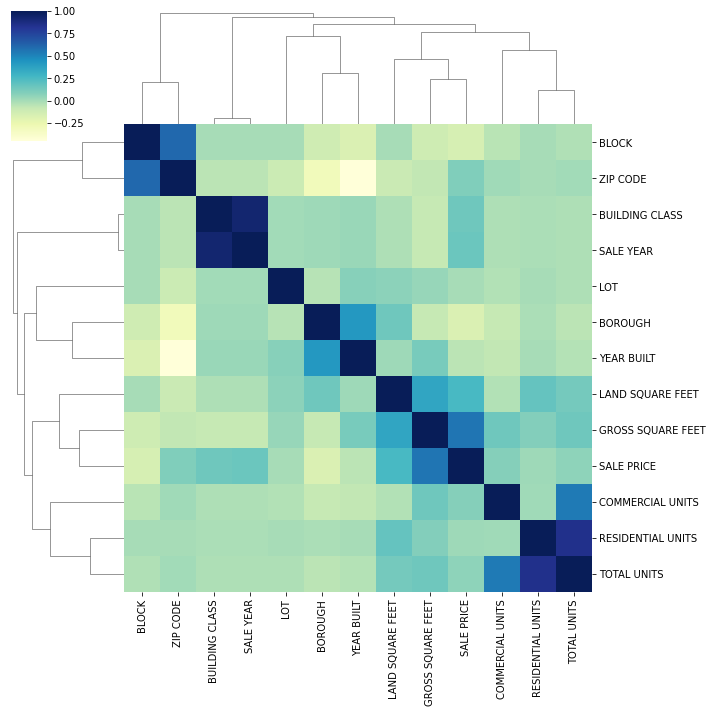

In [8]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
#         vmin=-1.0,
#         vmax=1.0,
        cmap="YlGnBu",
#         method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(dataset, annot=None)

visualization saleprice


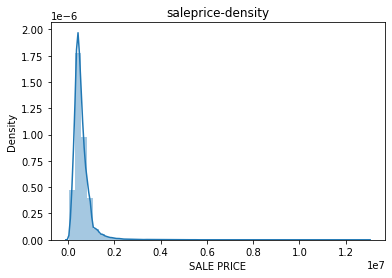

In [9]:
print("""visualization saleprice""")
SalePrice = dataset['SALE PRICE']
sns.distplot(SalePrice)
plt.title("saleprice-density")
plt.show()

visualization saleprice


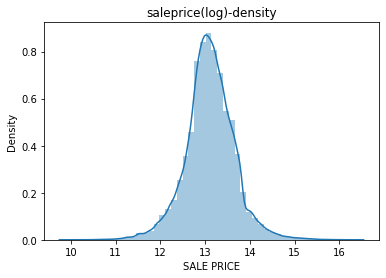

In [10]:
print("""visualization saleprice""")
y = np.log1p(SalePrice)
sns.distplot(y)
plt.title("saleprice(log)-density")
plt.show()

#####  Examine the correlations between variables, in particular which variables are associated with SalePrice


According to the correlation matrix, the darker the color, the greater the correlation


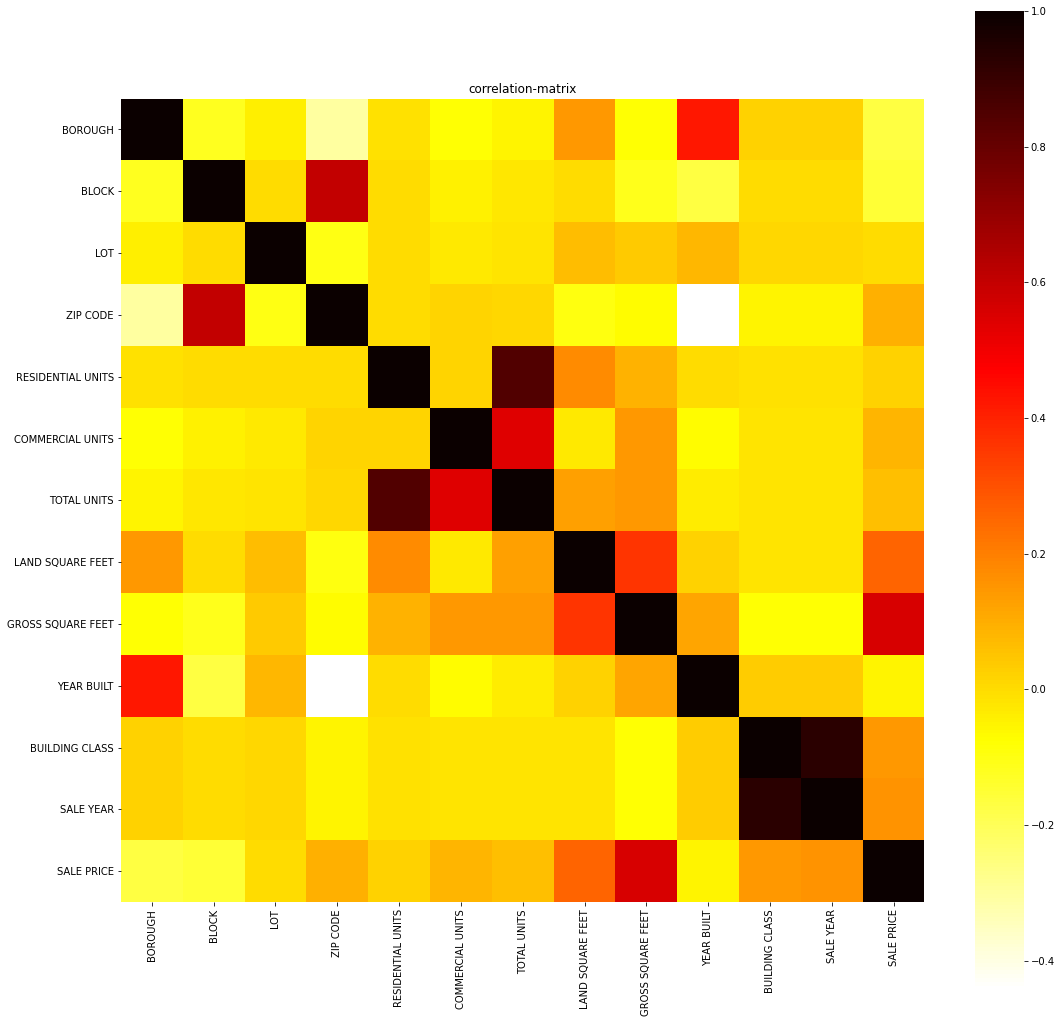

In [11]:
print("According to the correlation matrix, the darker the color, the greater the correlation")
correlation_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_matrix, cmap="hot_r", square=True)
plt.title("correlation-matrix")
plt.show()

In [12]:
"""Find the top-k attributes associated with SalePrice"""
feature_name = correlation_matrix.columns
saleprice_feature = correlation_matrix.tail(1).values[0]
print(feature_name)
print(saleprice_feature)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'BUILDING CLASS', 'SALE YEAR',
       'SALE PRICE'],
      dtype='object')
[-1.71152737e-01 -1.53650265e-01 -4.67885148e-04  9.78547629e-02
  2.27891212e-02  8.24802047e-02  6.13451177e-02  2.58635623e-01
  5.60244828e-01 -5.16724054e-02  1.43612094e-01  1.55453856e-01
  1.00000000e+00]


In [13]:
"""The features related to SalePrice and the corresponding degree of correlation"""
feature_corr_dict = {}
for i in range(len(feature_name)):
    feature_corr_dict[feature_name[i]] = saleprice_feature[i]
k = 7
sorted_feature_corr_dict = sorted(feature_corr_dict.items(), key=lambda item:item[1], reverse=True)[:k+1]
print(sorted_feature_corr_dict)

[('SALE PRICE', 1.0), ('GROSS SQUARE FEET', 0.5602448276498636), ('LAND SQUARE FEET', 0.25863562270198875), ('SALE YEAR', 0.15545385596631872), ('BUILDING CLASS', 0.14361209405917308), ('ZIP CODE', 0.09785476287512228), ('COMMERCIAL UNITS', 0.08248020472727415), ('TOTAL UNITS', 0.06134511768241562)]


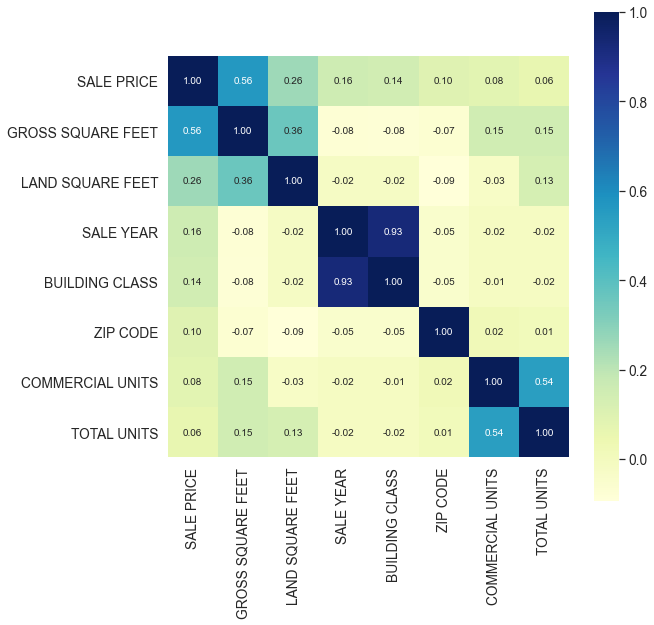

In [14]:
cols = [line[0] for line in sorted_feature_corr_dict]
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(9, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, cmap="YlGnBu",
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

In [15]:
cols

['SALE PRICE',
 'GROSS SQUARE FEET',
 'LAND SQUARE FEET',
 'SALE YEAR',
 'BUILDING CLASS',
 'ZIP CODE',
 'COMMERCIAL UNITS',
 'TOTAL UNITS']

## prepare dataset

In [16]:
# y = np.log1p(dataset["SALE PRICE"])
y = dataset["SALE PRICE"]

In [17]:
X = dataset[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET','GROSS SQUARE FEET', 'YEAR BUILT', 'BUILDING CLASS', 'SALE YEAR']]

In [18]:
# from sklearn.preprocessing import StandardScaler,RobustScaler

# # scaler=StandardScaler()
# scaler=RobustScaler()
# X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [19]:
cols[1:]

['GROSS SQUARE FEET',
 'LAND SQUARE FEET',
 'SALE YEAR',
 'BUILDING CLASS',
 'ZIP CODE',
 'COMMERCIAL UNITS',
 'TOTAL UNITS']

In [20]:
X = X[cols[1:]]

# X = X[['GROSS SQUARE FEET','SALE YEAR']]

In [21]:
X.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = .3, random_state=0)

## Random Forest Model

In [23]:
# Fit Random Forest on Training Set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

# Score model
regressor.score(X_train, Y_train)

0.9534314556788974

In [89]:
scorelist = []
for i in range(10, 200, 20):
    regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    regressor.fit(X_train, Y_train)
    score = regressor.score(X_train, Y_train)
    scorelist.append(score)

In [24]:
# Predict new result
y_pred = regressor.predict(X_test)
len(y_pred)

29709

In [25]:
len(Y_test)

29709

In [26]:
Y_test.values

array([557000, 420000, 623000, ..., 300000, 279000, 445000], dtype=int64)

In [27]:
regressor.score(X_test, Y_test)

0.689140278537351

In [28]:
mean_squared_error (y_pred, Y_test)

56299213774.77358

In [29]:
mean_absolute_error (y_pred, Y_test)

130516.57047893351

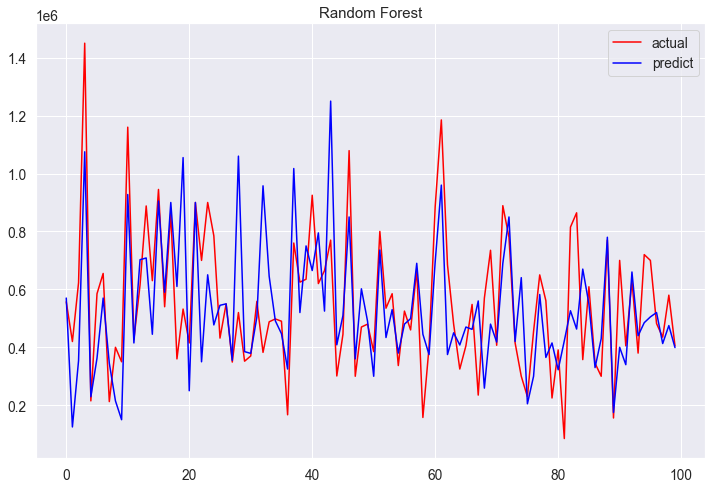

In [85]:
# # Predict new result
# y_pred = regressor.predict(X_test)
# Plot y_test vs y_pred
plt.figure(figsize=(12,8))
plt.plot(Y_test.values[:100], color='red', label="actual")
plt.plot(y_pred[:100], color='blue', label="predict")
plt.legend()
plt.title("Random Forest")
plt.show()

In [31]:
## predict 2020

In [32]:
X.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0


In [33]:
len(X["ZIP CODE"].unique())

165

In [34]:
len(X[X["SALE YEAR"]==2017]["ZIP CODE"].unique())

146

In [35]:
predict_2020_dataset = X[X["SALE YEAR"]==2017].copy()
unexist_ZIPCODE = list(set(list(X["ZIP CODE"].unique())) - set(list(predict_2020_dataset["ZIP CODE"].unique())))

for zipcode in unexist_ZIPCODE:
    new_ = X[X["ZIP CODE"]==zipcode]
    predict_2020_dataset = predict_2020_dataset.append(new_)

In [36]:
predict_2020_dataset["SALE YEAR"] = 2020
predict_2020_dataset.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS
61258,1460.0,1330.0,2020,2,10457.0,0.0,1.0
61259,1440.0,1306.0,2020,2,10457.0,0.0,1.0
61260,1440.0,1306.0,2020,2,10457.0,0.0,1.0
61261,1587.0,1622.0,2020,2,10457.0,0.0,1.0
61262,1497.0,1694.0,2020,2,10457.0,0.0,1.0


In [37]:
pred_2020_values = regressor.predict(predict_2020_dataset)

In [38]:
predict_2020_dataset["SALE PRICE"] = pred_2020_values
predict_2020_dataset.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE
61258,1460.0,1330.0,2020,2,10457.0,0.0,1.0,423876.400000
61259,1440.0,1306.0,2020,2,10457.0,0.0,1.0,451719.670000
61260,1440.0,1306.0,2020,2,10457.0,0.0,1.0,451719.670000
61261,1587.0,1622.0,2020,2,10457.0,0.0,1.0,431184.477333
61262,1497.0,1694.0,2020,2,10457.0,0.0,1.0,436633.374762


In [39]:
alldata = X.copy()
alldata["SALE PRICE"] = y

In [40]:
alldata

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0,329000
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0,288500
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0,122500
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0,330000
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0,288000
...,...,...,...,...,...,...,...,...
99022,1800.0,3020.0,2019,2,10309.0,0.0,1.0,560000
99023,2400.0,5000.0,2019,2,10309.0,0.0,1.0,825000
99024,1500.0,2500.0,2019,2,10309.0,0.0,1.0,640000
99025,2160.0,2392.0,2019,2,10309.0,0.0,1.0,635000


In [41]:
data_11_20 = alldata.append(predict_2020_dataset)
data_11_20.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0,329000.0
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0,288500.0
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0,122500.0
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0,330000.0
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0,288000.0


In [42]:
SalesYear = data_11_20.groupby(['SALE YEAR']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
SalesYear['PriceperSQFT'] = SalesYear['SALE PRICE'] / SalesYear['GROSS SQUARE FEET']

In [43]:
SalesYear

,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
SALE YEAR,,,
2011,3.698760e+09,12957452.0,285.454231
2012,4.305591e+09,14914505.0,288.684790
2013,5.163403e+09,17211876.0,299.990726
2014,5.551956e+09,17550008.0,316.350621
2015,6.574563e+09,18341290.0,358.456946
2016,7.205983e+09,20235251.0,356.110400
2017,8.151779e+09,20018602.0,407.210188
2018,8.320366e+09,19578071.0,424.983941
2019,7.956392e+09,18297794.0,434.827915


Text(0.5, 1.0, 'Random Forest')

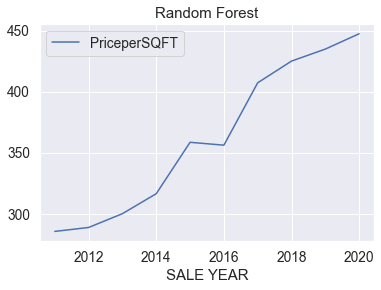

In [87]:
SalesYear.plot(y = 'PriceperSQFT', use_index = True)
plt.title("Random Forest")

## explore on each zip code

In [45]:
data_11_20.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0,329000.0
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0,288500.0
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0,122500.0
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0,330000.0
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0,288000.0


In [46]:
year_zipcode_data = data_11_20.groupby(['SALE YEAR','ZIP CODE']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
year_zipcode_data['PRICE_SQFT'] = year_zipcode_data['SALE PRICE'] / year_zipcode_data['GROSS SQUARE FEET']
year_zipcode_data.head()

SALE PRICE  GROSS SQUARE FEET   PRICE_SQFT
SALE YEAR ZIP CODE                                            
2011      10003.0   12622812.0            12863.0   981.327218
          10011.0    8150000.0             7684.0  1060.645497
          10013.0   10065000.0             9531.0  1056.027699
          10014.0    6330000.0             6850.0   924.087591
          10016.0   17875000.0            21861.0   817.666163

In [47]:
zipcode_year_data = data_11_20.groupby(['ZIP CODE','SALE YEAR']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
zipcode_year_data['PRICE_SQFT'] = zipcode_year_data['SALE PRICE'] / zipcode_year_data['GROSS SQUARE FEET']

In [48]:
zipcode_year_sqft = []
sqft = year_zipcode_data["PRICE_SQFT"].values
for idx, line in list(enumerate(zipcode_year_data.index)):
    zipcode, year = line
    price_sqft = sqft[idx]
    zipcode_year_sqft.append([zipcode, year, price_sqft])

In [49]:
zipcode_year_sqft = pd.DataFrame(zipcode_year_sqft, columns=['ZIP CODE', 'SALE YEAR', 'PRICE_SQFT']) 
zipcode_year_sqft.head()

,ZIP CODE,SALE YEAR,PRICE_SQFT
0,10001.0,2012,981.327218
1,10001.0,2013,1060.645497
2,10001.0,2014,1056.027699
3,10001.0,2018,924.087591
4,10001.0,2020,817.666163


In [50]:
sqft_2020 = zipcode_year_sqft[zipcode_year_sqft["SALE YEAR"] == 2020]

In [51]:
sqft = sqft_2020["PRICE_SQFT"].values

In [52]:
import scipy.stats as stats
stats.percentileofscore(sqft, 981.327218)

93.93939393939394

In [53]:
sqft_2020["percentile"] = sqft_2020["PRICE_SQFT"].apply(lambda x:stats.percentileofscore(sqft, x)) 

In [54]:
sqft_2020.head()

,ZIP CODE,SALE YEAR,PRICE_SQFT,percentile
4,10001.0,2020,817.666163,88.484848
6,10002.0,2020,1010.389348,95.757576
11,10003.0,2020,204.262877,9.696970
15,10009.0,2020,222.061407,13.939394
20,10011.0,2020,267.255268,24.848485


In [55]:
zipcode_houseprice = sqft_2020[["ZIP CODE", "percentile"]]

In [56]:
zipcode_houseprice.rename(columns={"ZIP CODE":"zipcode", "percentile":"house_perc"}, inplace=True)

In [57]:
zipcode_houseprice.head()

,zipcode,house_perc
4,10001.0,88.484848
6,10002.0,95.757576
11,10003.0,9.696970
15,10009.0,13.939394
20,10011.0,24.848485


In [58]:
zipcode_houseprice.to_csv("zipcode_houseprice.csv", index=None)

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)
tree_model.score(X_train, Y_train)

0.9927657239449461

In [60]:
# Predict new result
y_pred = tree_model.predict(X_test)
len(y_pred)

29709

In [61]:
tree_model.score(X_test, Y_test)

0.45430055155448934

In [62]:
mean_squared_error (y_pred, Y_test)

98830590725.15211

In [63]:
mean_absolute_error (y_pred, Y_test)

170849.14922871068

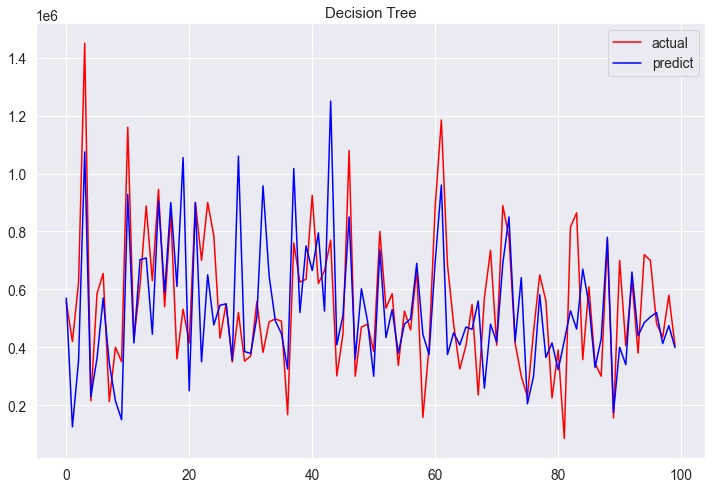

In [86]:
# # Predict new result
# y_pred = regressor.predict(X_test)
# Plot y_test vs y_pred
plt.figure(figsize=(12,8))
plt.plot(Y_test.values[:100], color='red', label="actual")
plt.plot(y_pred[:100], color='blue', label="predict")
plt.legend()
plt.title("Decision Tree")
plt.show()

In [65]:
## predict 2020

In [66]:
X.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0


In [67]:
predict_2020_dataset = X[X["SALE YEAR"]==2017].copy()
unexist_ZIPCODE = list(set(list(X["ZIP CODE"].unique())) - set(list(predict_2020_dataset["ZIP CODE"].unique())))

for zipcode in unexist_ZIPCODE:
    new_ = X[X["ZIP CODE"]==zipcode]
    predict_2020_dataset = predict_2020_dataset.append(new_)

In [68]:
predict_2020_dataset["SALE YEAR"] = 2020
predict_2020_dataset.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS
61258,1460.0,1330.0,2020,2,10457.0,0.0,1.0
61259,1440.0,1306.0,2020,2,10457.0,0.0,1.0
61260,1440.0,1306.0,2020,2,10457.0,0.0,1.0
61261,1587.0,1622.0,2020,2,10457.0,0.0,1.0
61262,1497.0,1694.0,2020,2,10457.0,0.0,1.0


In [69]:
pred_2020_values = tree_model.predict(predict_2020_dataset)
predict_2020_dataset["SALE PRICE"] = pred_2020_values
predict_2020_dataset.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE
61258,1460.0,1330.0,2020,2,10457.0,0.0,1.0,468000.0
61259,1440.0,1306.0,2020,2,10457.0,0.0,1.0,468000.0
61260,1440.0,1306.0,2020,2,10457.0,0.0,1.0,468000.0
61261,1587.0,1622.0,2020,2,10457.0,0.0,1.0,182500.0
61262,1497.0,1694.0,2020,2,10457.0,0.0,1.0,415000.0


In [70]:
alldata = X.copy()
alldata["SALE PRICE"] = y

In [71]:
data_11_20 = alldata.append(predict_2020_dataset)
data_11_20.head()

,GROSS SQUARE FEET,LAND SQUARE FEET,SALE YEAR,BUILDING CLASS,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,SALE PRICE
0,1296.0,1667.0,2011,0,10458.0,0.0,1.0,329000.0
1,1629.0,2060.0,2011,0,10457.0,0.0,1.0,288500.0
2,1048.0,1209.0,2011,0,10457.0,0.0,1.0,122500.0
3,1890.0,3203.0,2011,0,10469.0,0.0,1.0,330000.0
4,1018.0,1785.0,2011,0,10469.0,0.0,1.0,288000.0


In [72]:
SalesYear = data_11_20.groupby(['SALE YEAR']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
SalesYear['PriceperSQFT'] = SalesYear['SALE PRICE'] / SalesYear['GROSS SQUARE FEET']

In [73]:
SalesYear

,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
SALE YEAR,,,
2011,3.698760e+09,12957452.0,285.454231
2012,4.305591e+09,14914505.0,288.684790
2013,5.163403e+09,17211876.0,299.990726
2014,5.551956e+09,17550008.0,316.350621
2015,6.574563e+09,18341290.0,358.456946
2016,7.205983e+09,20235251.0,356.110400
2017,8.151779e+09,20018602.0,407.210188
2018,8.320366e+09,19578071.0,424.983941
2019,7.956392e+09,18297794.0,434.827915


Text(0.5, 1.0, 'Decision Tree')

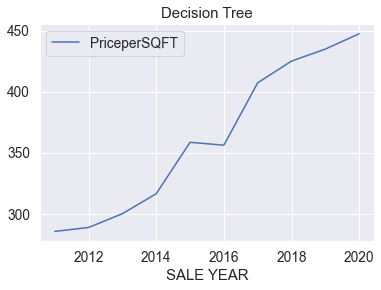

In [88]:
SalesYear.plot(y = 'PriceperSQFT', use_index = True)
plt.title("Decision Tree")

## Bayesian model

In [75]:
# # PyMC3 for Bayesian Inference
# import pymc3 as pm
# import arviz

In [76]:
# X.head()

In [77]:
# y.head()

In [78]:
# ## mutivariate regression

# formula = 'sale_price ~ ' + ' + '.join(['%s' % variable for variable in X.columns])
# formula

In [79]:
# print(np.mean(X["GROSS SQUARE FEET"]), np.std(X["GROSS SQUARE FEET"]))

In [80]:
# # Uniform
# with pm.Model() as normal_model:
    
#     # The prior for the model parameters
    
#     beta1 = pm.Normal('GROSS SQUARE FEET', mu=1606, sd=755) 
#     beta2 = pm.Normal('LAND SQUARE FEET', mu=3287, sd=2510)
#     beta3 = pm.Normal('SALE YEAR', mu=2015, sd=3)
# #     beta4 = pm.Normal('BUILDING CLASS', mu=1.2145374, sd=0.70868772)
# #     beta5 = pm.Normal('ZIP CODE', mu=11005, sd=488)
# #     beta6 = pm.Normal('COMMERCIAL UNITS', mu=0.01839, sd=0.140271)
# #     beta7 = pm.Normal('TOTAL UNITS', mu=1.0230, sd=0.2599)
#     sigma = 8000

#     # Creating the model requires a formula and data (and optionally a family)
# #     mean = beta1 * X['GROSS SQUARE FEET'] + beta2 * X['LAND SQUARE FEET'] + beta3 * X['SALE YEAR'] + beta4 * X['BUILDING CLASS'] + beta5 * X['ZIP CODE'] + beta6 * X['COMMERCIAL UNITS'] + beta7 * X['TOTAL UNITS']
#     mean = beta1 * X['GROSS SQUARE FEET'] + beta2 * X['LAND SQUARE FEET'] + beta3 * X['SALE YEAR'] 
    
#     # Observed values
#     Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
#     # MCMC sampling
#     # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
# #     start = pm.find_MAP()
#     trace = pm.sample(100, progressbar=True)

In [ ]:
# fig = pm.traceplot(trace[199:1000])
# plt.figure(figsize = (10, 10))

In [ ]:
# pm.plot_posterior(trace, figsize = (14, 14), text_size=20);

In [ ]:
# ## Linear Formula from Bayesian Inference using Mean of Parameters

# model_formula = 'sale_price = '
# for variable in trace.varnames:
#     model_formula += ' %0.2f * %s +' % (np.mean(trace[variable]), variable)

# ' '.join(model_formula.split(' ')[:-1])

In [82]:
# pm.plot_posterior(trace, figsize = (14, 14), text_size=20);

In [83]:
# ## Linear Formula from Bayesian Inference using Mean of Parameters

# model_formula = 'sale_price = '
# for variable in trace.varnames:
#     model_formula += ' %0.2f * %s +' % (np.mean(trace[variable]), variable)

# ' '.join(model_formula.split(' ')[:-1])